# Binary Classification Using Keras:Tunes (Hyperparameter-Tuning)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import keras_tuner
from kerastuner import HyperModel
from kerastuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 32)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
encoder=preprocessing.LabelEncoder()

df['diagnosis']=encoder.fit_transform(df['diagnosis'])

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.corr("pearson")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [11]:
corr_matrix = df.corr().abs()

In [12]:
threshold=0.7
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]  
   
df = df.drop(to_drop, axis=1)  
print(df.head())

   diagnosis  texture_mean  smoothness_mean  compactness_mean  symmetry_mean  \
0          1         10.38          0.11840           0.27760         0.2419   
1          1         17.77          0.08474           0.07864         0.1812   
2          1         21.25          0.10960           0.15990         0.2069   
3          1         20.38          0.14250           0.28390         0.2597   
4          1         14.34          0.10030           0.13280         0.1809   

   fractal_dimension_mean  texture_se  smoothness_se  symmetry_se  \
0                 0.07871      0.9053       0.006399      0.03003   
1                 0.05667      0.7339       0.005225      0.01389   
2                 0.05999      0.7869       0.006150      0.02250   
3                 0.09744      1.1560       0.009110      0.05963   
4                 0.05883      0.7813       0.011490      0.01756   

   symmetry_worst  
0          0.4601  
1          0.2750  
2          0.3613  
3          0.6638  
4   

In [13]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [14]:
X.shape

(569, 9)

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X

array([[-2.07333501,  1.56846633,  3.28351467, ..., -0.21400165,
         1.14875667,  2.75062224],
       [-0.35363241, -0.82696245, -0.48707167, ..., -0.60535085,
        -0.80545038, -0.24388967],
       [ 0.45618695,  0.94221044,  1.05292554, ..., -0.29700501,
         0.23703554,  1.152255  ],
       ...,
       [ 2.0455738 , -0.84048388, -0.03867967, ..., -0.37934168,
        -0.89141612, -1.10454895],
       [ 2.33645719,  1.52576706,  3.27214378, ..., -0.17299998,
         0.32663363,  1.91908301],
       [ 1.22179204, -3.11208479, -1.15075248, ...,  0.04934236,
         0.75282996, -0.04813821]])

In [17]:
X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.1,random_state=42)

In [21]:
class MyHyperModel(HyperModel):  
   def __init__(self):  
      self.input_dim = 9  
      self.output_dim = 1  
  
   def build(self, hp):  
      model = keras.Sequential()  
      model.add(layers.Input(shape=(self.input_dim,)))  
  
      # Add hidden layers  
      for i in range(hp.Int('num_layers', 1, 3)):  
        model.add(layers.Dense(hp.Choice(f'units_{i}', [8, 16, 32]), activation='relu'))  
        if hp.Boolean(f'dropout_{i}'):  
           model.add(layers.Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))  
  
      # Add output layer  
      model.add(layers.Dense(self.output_dim, activation='sigmoid'))  
  
      # Define optimizer and learning rate  
      optimizer = hp.Choice('optimizer', ['sgd', 'adam', 'rmsprop'])  
      learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, step=1e-3)  
  
      # Compile model  
      model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  
  
      return model


In [23]:
# Define the hyperparameter tuner  
tuner = RandomSearch(  
   MyHyperModel(),  
   objective='val_accuracy',  
   max_trials=10,  
   executions_per_trial=3,  
   directory='my_dir',  
   project_name='my_project'  
)  

In [25]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val)) 

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.7602339188257853

Best val_accuracy So Far: 0.859649121761322
Total elapsed time: 00h 01m 09s


In [26]:
# Get the best hyperparameters  
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] 

In [29]:
best_hps.values

{'num_layers': 3,
 'units_0': 16,
 'dropout_0': True,
 'optimizer': 'rmsprop',
 'learning_rate': 0.07010000000000001,
 'dropout_rate_0': 0.1,
 'units_1': 32,
 'dropout_1': False,
 'dropout_rate_1': 0.1,
 'units_2': 32,
 'dropout_2': True,
 'dropout_rate_2': 0.1}

In [32]:
# Train the best model  
best_model = tuner.hypermodel.build(best_hps)  
history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6174 - loss: 0.6459 - val_accuracy: 0.7018 - val_loss: 0.5740
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.5852 - val_accuracy: 0.8070 - val_loss: 0.5303
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.5434 - val_accuracy: 0.7895 - val_loss: 0.4967
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.5014 - val_accuracy: 0.7544 - val_loss: 0.4670
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4659 - val_accuracy: 0.7719 - val_loss: 0.4365
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8408 - loss: 0.4233 - val_accuracy: 0.8070 - val_loss: 0.4120
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8668 - loss: 0.3751 - val_accuracy: 0.8246 - val_loss: 0.3969
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3455 - val_accuracy: 0.8421 - val_loss

In [34]:
# Evaluate the best model  
loss, accuracy = best_model.evaluate(X_val, y_val)  
print(f"Best model accuracy: {accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8427 - loss: 0.3662 
Best model accuracy: 0.84


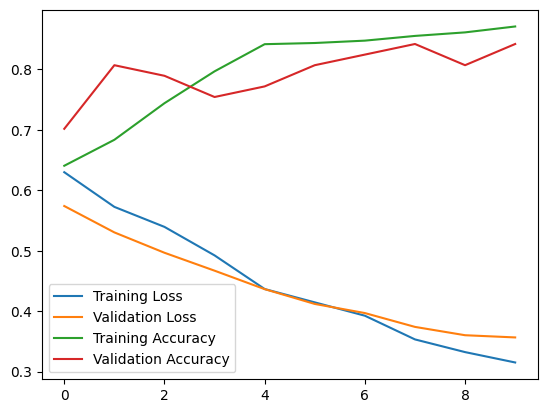

In [35]:
plt.plot(history.history['loss'], label='Training Loss')  
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.plot(history.history['accuracy'], label='Training Accuracy')  
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  
plt.legend()  
plt.show()